In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from coloring_problem import obtain_colors, create_adjacent_matrix2

In [3]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [6]:
# Load the shapefile (this path assumes you have the shapefile locally)
gdf = gpd.read_file('./COMARQUES/divisions-administratives-v2r1-comarques-250000-20240701.shp')
gdf['NOM'] = gdf['NOMCOMAR']
"""gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')
gdf['NOM'] = gdf['NOMMUNI']"""

"gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')\ngdf['NOM'] = gdf['NOMMUNI']"

In [7]:
matriu = create_adjacent_matrix2(gdf)

color_numbers = obtain_colors(matriu)


6
5
4
3
3 100
3 200


In [8]:
# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(gdf['NOM'], color_numbers)}

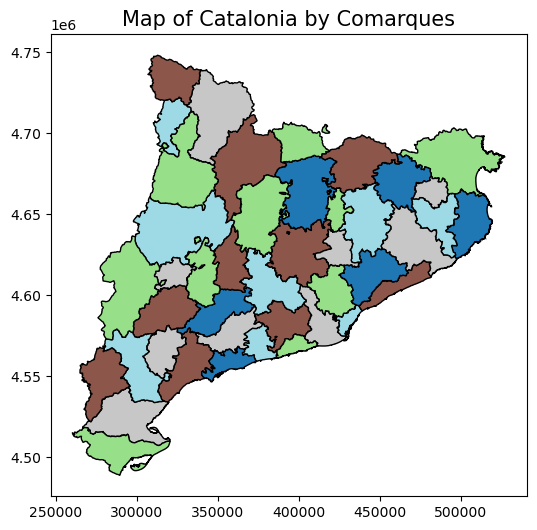

In [9]:
# Create a new column for colors based on the comarca names
gdf['color'] = gdf['NOM'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')

# Optional: Customize the title and layout
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.show()